# Portfolio Project: Happy Customers 

## Introduction
The main focus of this project is on a recent survey to a select customer cohort done by one of the fastest growing startups in the logistics and delivery domain that thrives on making their customers happy. A subset of this data is provided.<br>
    The primary objective of this project is to predict if a customer is happy or not based on the answers they have given to the questions asked based on different predictive models. The models considered for prediction are *Logistic Regression* and *Deep Learning* models.

## Data Description

- ``Y`` = Target attribute with values indicating 0 (unhappy) and 1 (happy) customers
- ``X1`` = My order was delivered on time
- ``X2`` = Contents of my order was as I expected
- ``X3`` = I ordered everything I wanted to order
- ``X4`` = I paid a good price for my order
- ``X5`` = I am satisfied with my courier
- ``X6`` = The app makes ordering easy for me

Attributes ``X1`` to ``X6`` indicate the responses for each question and have values from 1 to 5; the smallest number indicates less likely and the highest number indicates more likely towards the answer.

## Exploratory Data Analysis

In this step, some exploratory data analysis is performed to the given data set in order to find some interesting insights, such as detection of missing data, the type of variables the data set has, the distribution for each variable, and how correlated these variables are with each other.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [48]:
happiness = pd.read_csv('ACME-HappinessSurvey2020.csv')
happiness.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [49]:
happiness.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


In [50]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [51]:
happiness.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [52]:
happiness['Y'].value_counts(normalize = True)

1   0.55
0   0.45
Name: Y, dtype: float64

Based on these outputs, it can be noticed that the data set has 126 observations and 7 variables, it has no missing data, every variable is numerical with integer values; however, these variables can also be considered as ordinal categorical variables. The target variable ``Y`` has more happy customers than unhappy with proportions of 54.8% and 45.2%, respectively. 

<Figure size 640x480 with 0 Axes>

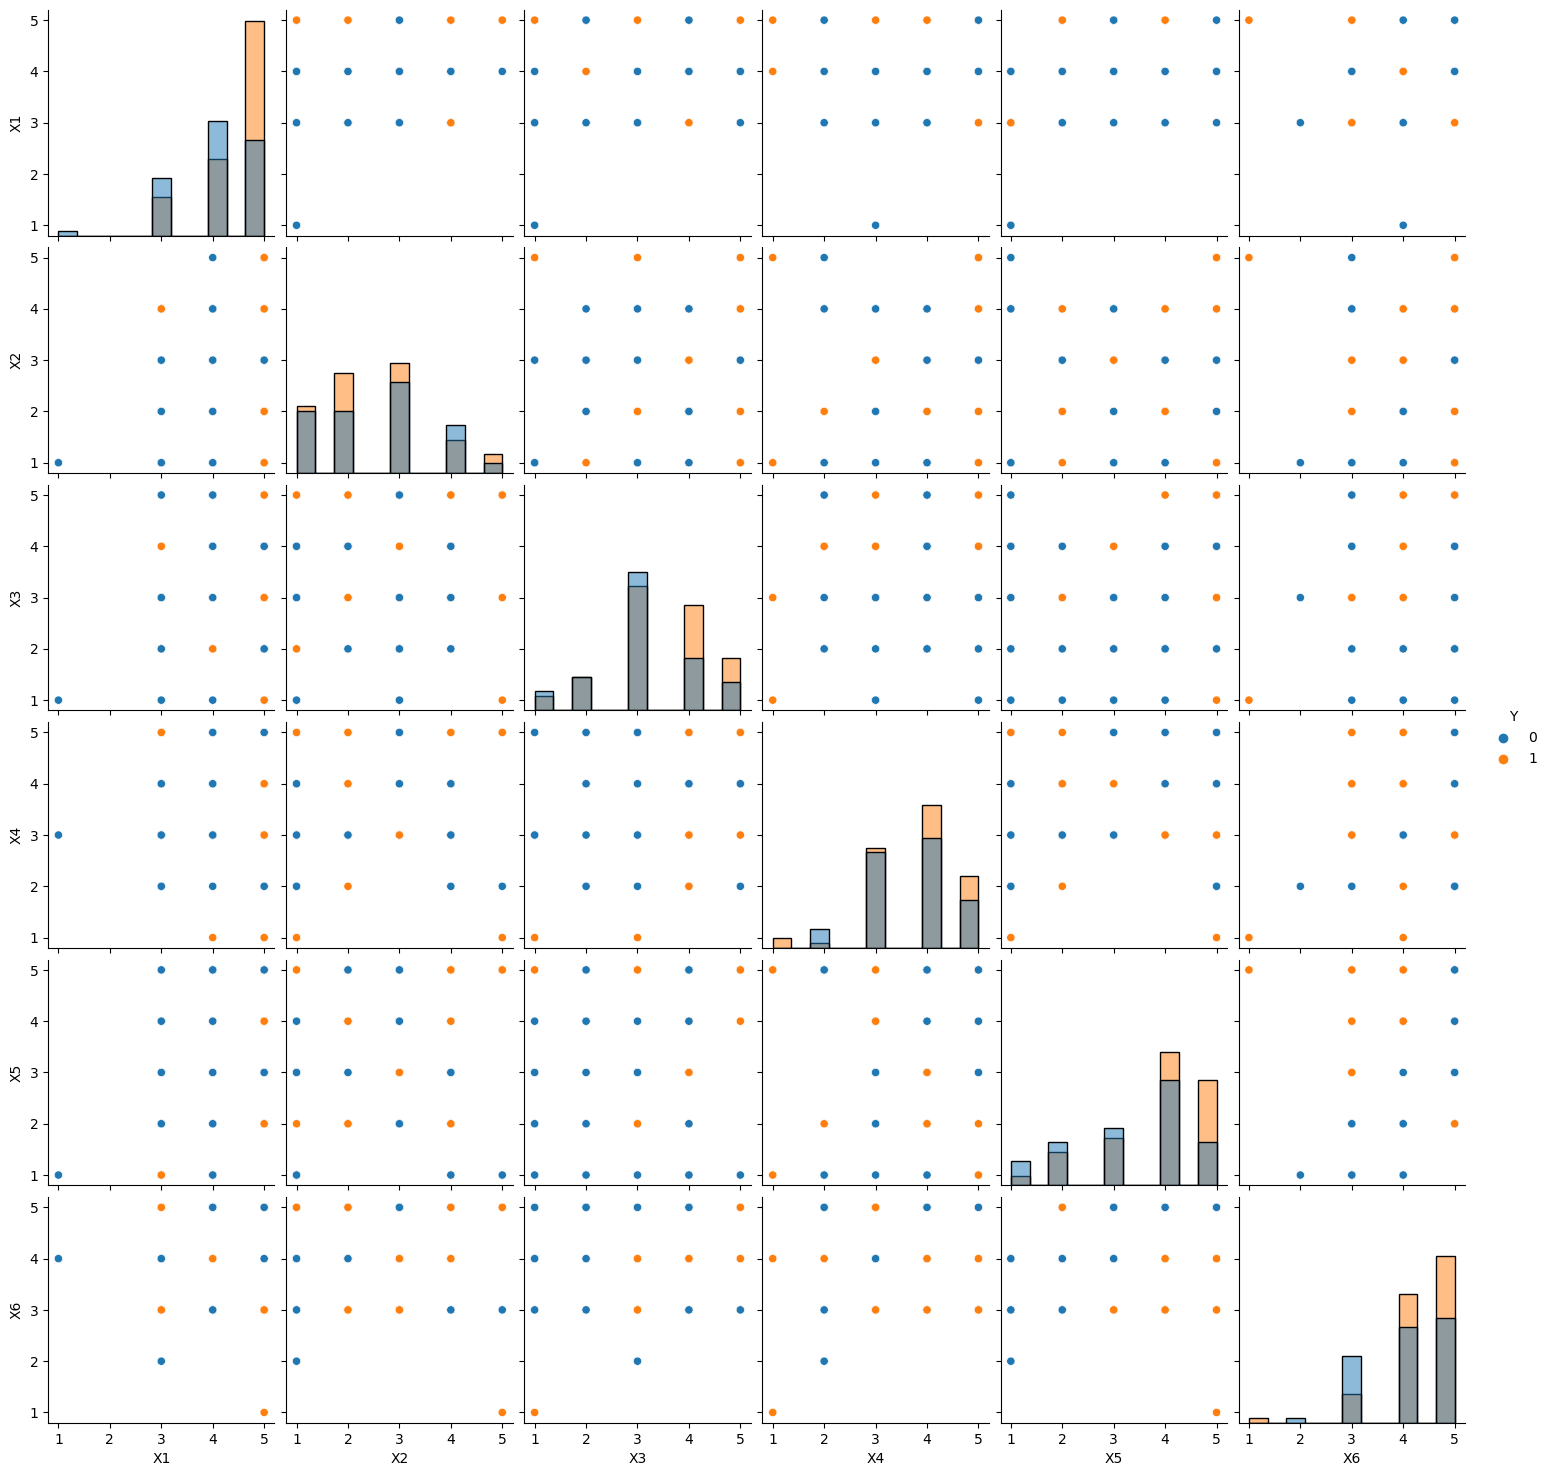

In [53]:
sns.pairplot(happiness, hue = 'Y', diag_kind="hist")
plt.show()
plt.clf()

Based on these pairplots, it can be noticed that most of the variables are left-skewed distributed; it seems that customers tend to be happier when the answers of the questions reach the highest levels (4 and 5). ``X2`` and ``X3`` variables are roughly normal distributed, which means that the contents of the order might determine customer's happiness level equally likely.

<Figure size 640x480 with 0 Axes>

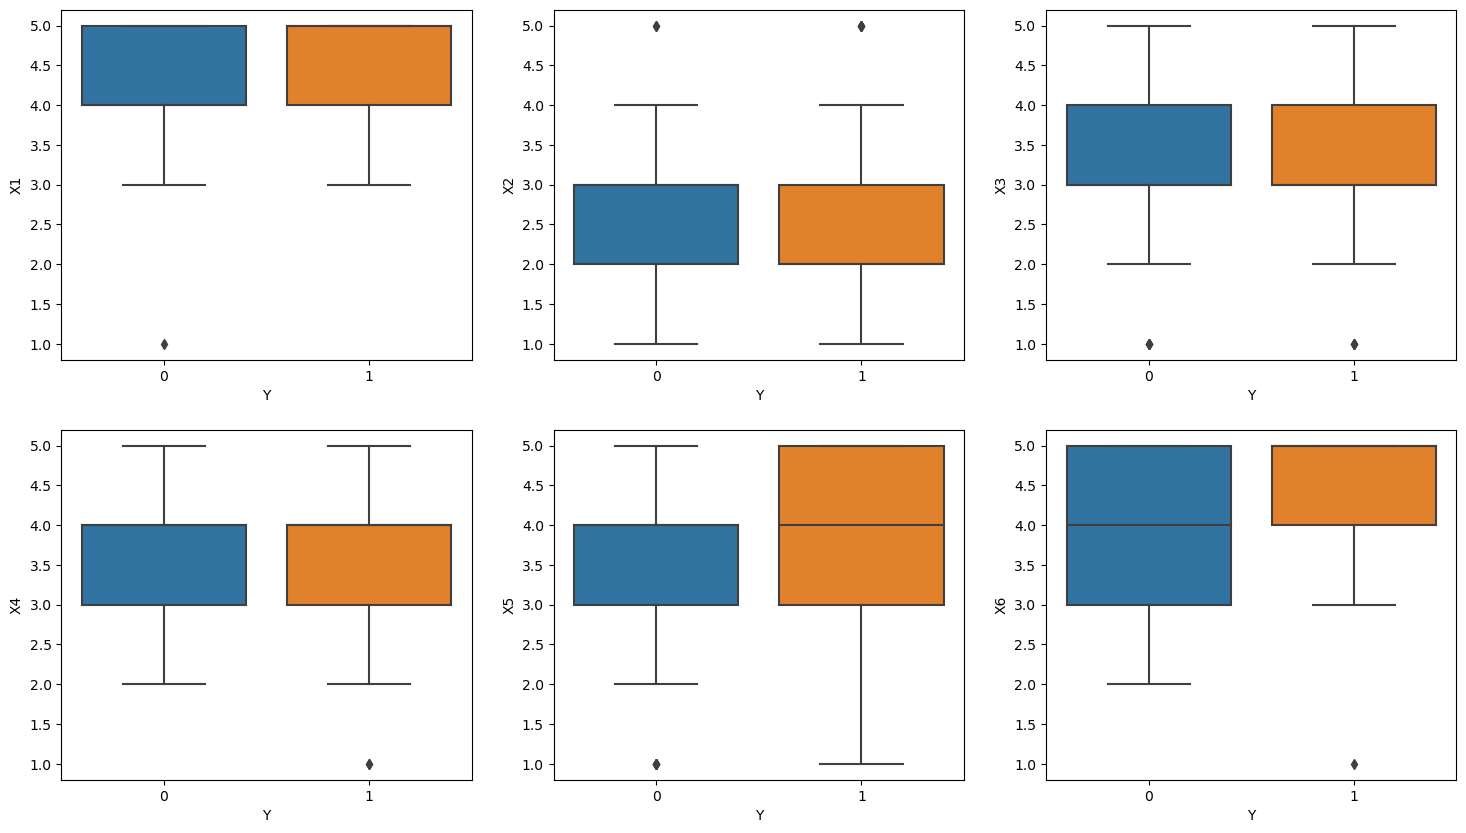

In [54]:
fig, axes = plt.subplots(2,3,figsize=(18, 10))
sns.boxplot(ax = axes[0,0],data = happiness, x = 'Y', y = 'X1')
sns.boxplot(ax = axes[0,1],data = happiness, x = 'Y', y = 'X2')
sns.boxplot(ax = axes[0,2],data = happiness, x = 'Y', y = 'X3')
sns.boxplot(ax = axes[1,0],data = happiness, x = 'Y', y = 'X4')
sns.boxplot(ax = axes[1,1],data = happiness, x = 'Y', y = 'X5')
sns.boxplot(ax = axes[1,2],data = happiness, x = 'Y', y = 'X6')
plt.show()
plt.clf()

Based on these boxplots, it can be noticed that there is a lot of overlapping between the boxes for every variable based on the target variable outputs; due to overlapping, it may not exist any association between the variables at all.

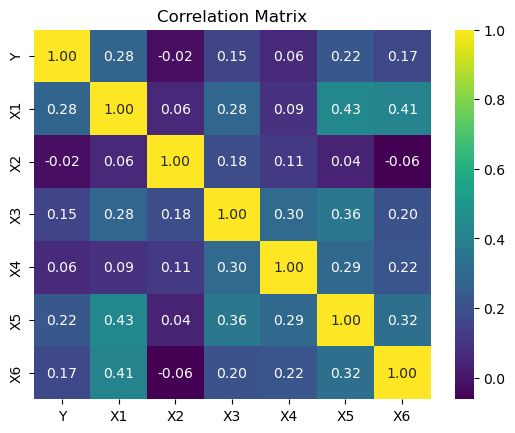

In [55]:
corr_matrix = happiness.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'viridis', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()
plt.clf()

The correlation matrix is very helpful to determine how variables are correlated with each other. Based on this heatmap, it can be noticed that there is a weak positive correlation between most of the variables, and variables such as ``X2`` and ``X6`` have weak negative correlation with the rest of the variables or have no correlation at all due to their closeness to 0. 

## Happiness Prediction

This step is focused on how to predict whether or not customers are happy by training different machine learning models. We train a logistic model and some deep learning models for happiness prediction. For each model, the data is split into training data and test data with sizes of 75% and 25%, respectively. Additionally, evaluation metrics will be reported for each model.

### Logistic Regression Model

This model uses the sigmoid function to link the log-odds of a data point to the range [0,1]. Since the only outcomes of the target variable ``Y`` are 0(Unhappy) and 1(Happy), the logistic regression model is very useful since the sigmoid function provides a probability for the classification decision (Happy or Unhappy).  

In [56]:
X = happiness.drop(['Y'],axis = 1)
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [57]:
y = happiness.Y
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .25, random_state = 16)

#fit logistic model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
coefficients = logit_model.coef_
intercept = logit_model.intercept_
print('Coefficients: ', coefficients)
print('Intercept: ', intercept)

Coefficients:  [[ 0.42675542 -0.08685985  0.0569267  -0.16631371  0.1097623   0.20102911]]
Intercept:  [-2.18935523]


Based on this output, the logistic regression model can be described with the formula: <br>
$\log\left(\cfrac{P(Y = 1)}{P(Y = 0)}\right) = -2.18935523 + .042675542X_1 - .08685985X_2 + .0569267X_3 - .16631371X_4 + .1097623X_5 + .20102911X_6$ <br>, where the link function is the natural log of the ratio of the probability that a customer is happy to the probability that a customer is unhappy.

In [59]:
#predicted outcomes
y_pred = logit_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [60]:
y_test

63     0
92     1
13     0
97     1
81     0
45     1
86     1
25     0
61     1
7      1
48     1
76     0
26     1
66     0
9      0
39     1
64     1
73     0
108    0
112    0
5      1
99     0
56     0
114    0
51     1
10     0
11     0
82     1
120    0
79     1
53     1
29     1
Name: Y, dtype: int64

In [61]:
#probabilities
prob_pred = logit_model.predict_proba(X_test)[:,1]
prob_pred

array([0.73420946, 0.59940232, 0.44576956, 0.63859913, 0.40988854,
       0.66607572, 0.71292616, 0.3181954 , 0.70829367, 0.64648618,
       0.59282737, 0.47393371, 0.43131208, 0.31252942, 0.65005103,
       0.4254092 , 0.54475429, 0.66087845, 0.70829367, 0.55873975,
       0.59947816, 0.38274712, 0.60284959, 0.66004517, 0.68407586,
       0.35701175, 0.47974059, 0.53732155, 0.36482765, 0.62647985,
       0.7198389 , 0.62423904])

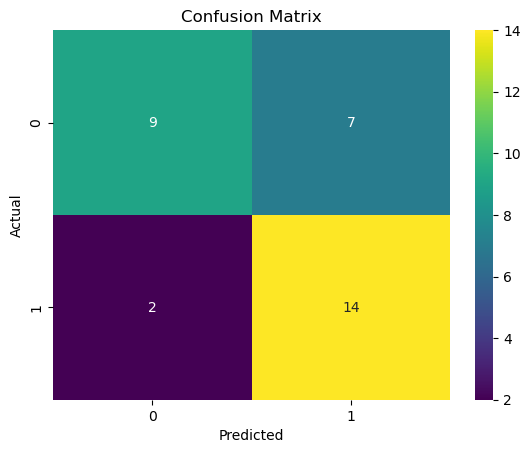

In [62]:
conf_mtx = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(conf_mtx), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [63]:
from sklearn.metrics import classification_report, f1_score
names = ['Unhappy', 'Happy']
print(classification_report(y_test, y_pred, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.82      0.56      0.67        16
       Happy       0.67      0.88      0.76        16

    accuracy                           0.72        32
   macro avg       0.74      0.72      0.71        32
weighted avg       0.74      0.72      0.71        32



<Figure size 640x480 with 0 Axes>

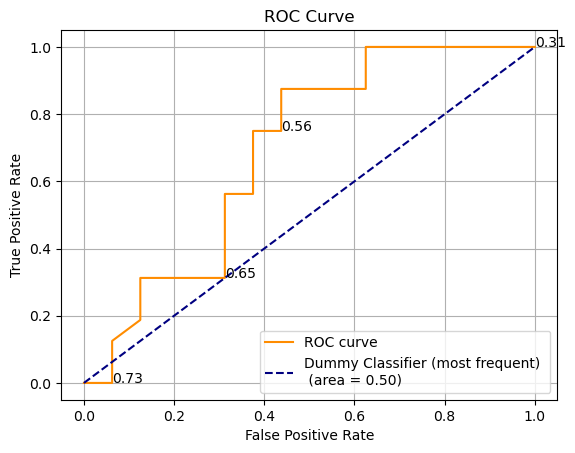

In [64]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, prob_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
idx = list(range(len(thresholds)))[1::4]

for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))
    
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--',
         label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()
plt.close()

In [65]:
roc_auc = roc_auc_score(y_test, prob_pred)
print(roc_auc)

0.689453125


Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The vast majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The predicted probabilities obtained from the model estimated whether the customer is happy or not; using a threshold of 0.50, it can be easily predicted the customer's happiness
- The confusion matrix indicates the True Negatives, True Positives, False Positives, and False Negatives proportions, and such proportions are helpful to calculate the precision, recall, f1-score, and accuracy for model evaluation
- The model's accuracy is 0.72, which indicates that the model has some bias predicting more happy customers than unhappy
- The Receiving Operating Characteristic (ROC) curve can be obtained by calculating and plotting the True Positive Rate vs. the False Positive Rate. The Area Under the Curve (AUC) is helpful to determine how well the model can distinghish between the two classes (0 and 1). Since the Area Under the Curve is approximately equal to 0.69 and is close to 1, this indicates that the logistic regression model is almost a perfect classifier

### Naive Bayes Classifier
This model's algorithm is based on Bayes' theorem of probability for prediction of an unknown class. This model assumes that the effect of a particular answer of any question for either class (Happy or Unhappy) is independent of other answers from other questions, which is why this model is considered naive.

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

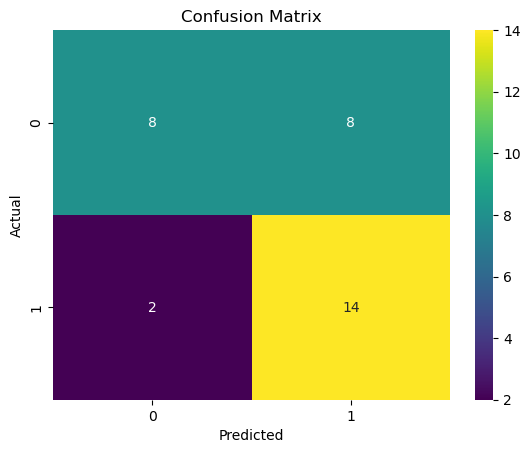

In [67]:
conf_mtx_2 = metrics.confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(pd.DataFrame(conf_mtx_2), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [68]:
print(classification_report(y_test, y_pred_gnb, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.80      0.50      0.62        16
       Happy       0.64      0.88      0.74        16

    accuracy                           0.69        32
   macro avg       0.72      0.69      0.68        32
weighted avg       0.72      0.69      0.68        32



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The vast majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.69, which indicates that the model has some bias predicting more happy customers than unhappy

### K Nearest Neighbor (KNN) Classifier
This model's algorithm is trained on a labeled dataset and uses the input features to learn the mapping between the inputs and the corresponding class labels. It can be considered a voting system.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors=8)
KNNClassifier.fit(X_train, y_train)
KNNC_pred = KNNClassifier.predict(X_test)
KNNC_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

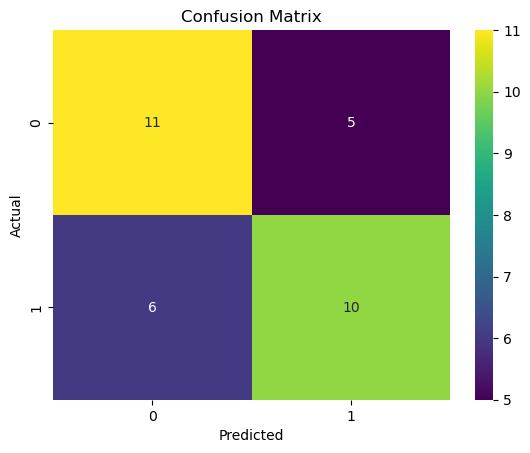

In [70]:
conf_mtx_3 = metrics.confusion_matrix(y_test,KNNC_pred)
sns.heatmap(pd.DataFrame(conf_mtx_3), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [71]:
print(classification_report(y_test, KNNC_pred, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.65      0.69      0.67        16
       Happy       0.67      0.62      0.65        16

    accuracy                           0.66        32
   macro avg       0.66      0.66      0.66        32
weighted avg       0.66      0.66      0.66        32



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The vast majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.66, which indicates that the model has some bias predicting more happy customers than unhappy

### Bernoulli NB Classifier
This model's algorithm classifies data that contains binary-valued features (0 and 1). For this model, it is required to convert every predictor variable as a binary-feature vector.

In [113]:
from sklearn.naive_bayes import BernoulliNB
#Get binary-feature vectors for training data and test data
X_train_0_1 = np.where(X_train < 3,0,1)
X_train_0_1 = pd.DataFrame(X_train_0_1,columns = ['X1','X2','X3','X4','X5','X6'])

X_test_0_1 = np.where(X_test < 3,0,1)
X_test_0_1 = pd.DataFrame(X_test_0_1,columns = ['X1','X2','X3','X4','X5','X6'])

bern_clf = BernoulliNB()
bern_clf.fit(X_train_0_1, y_train)
bern_pred = bern_clf.predict(X_test_0_1)
bern_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

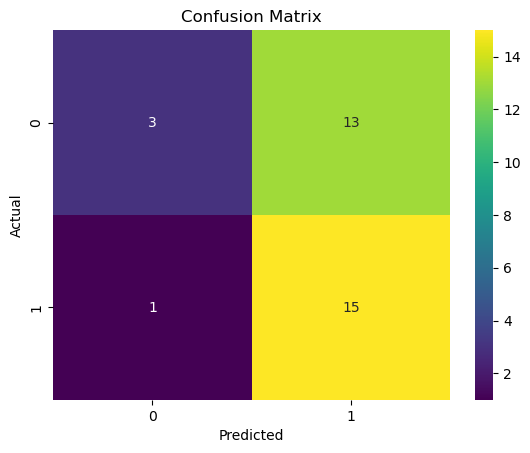

In [114]:
conf_mtx_4 = metrics.confusion_matrix(y_test,bern_pred)
sns.heatmap(pd.DataFrame(conf_mtx_4), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [115]:
print(classification_report(y_test, bern_pred, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.75      0.19      0.30        16
       Happy       0.54      0.94      0.68        16

    accuracy                           0.56        32
   macro avg       0.64      0.56      0.49        32
weighted avg       0.64      0.56      0.49        32



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The vast majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.56, which indicates that the model has more bias predicting more happy customers than unhappy

### Bagging Classifier
Bagging (Bootstrap Aggregation) is a technique for reducing the variance of an estimated prediction function. A committee of trees each cast a vote for the predicted class (Happy or Unhappy).

In [140]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),10,random_state = 20)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
y_pred_bagging

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

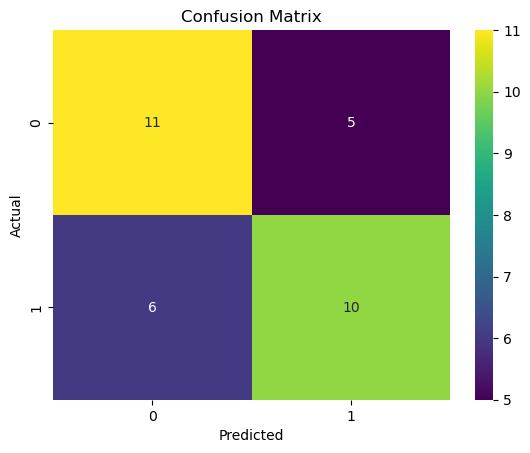

In [141]:
conf_mtx_5 = metrics.confusion_matrix(y_test,y_pred_bagging)
sns.heatmap(pd.DataFrame(conf_mtx_5), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [142]:
print(classification_report(y_test, y_pred_bagging, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.65      0.69      0.67        16
       Happy       0.67      0.62      0.65        16

    accuracy                           0.66        32
   macro avg       0.66      0.66      0.66        32
weighted avg       0.66      0.66      0.66        32



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The vast majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.66, which indicates that the model has more bias predicting more happy customers than unhappy

## Random Search Hyperparameter Optimization
The accuracy for every single predictive model was significantly high. However, a random search hyperparameter optimization will be required to improve the accuracy of the happiness prediction. This method searches for a range of values to a subset of the dataset to obtain the best performance of the models. Randomized search and grid search are the most common methods for hyperparameter optimization.

### Randomized Search

In [148]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 16) 
param_grid = { 
    'n_estimators': [i for i in range(0,7)], 
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': np.linspace(0.1, 1, 11), 
    'bootstrap': [True, False] 
} 

random_search = RandomizedSearchCV( 
  rf, 
  param_grid,  
  cv=5,  
  n_iter=10,  
  random_state=42) 
random_search.fit(X, y) 

print("Best Parameters: {}\n Best Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'n_estimators': 3, 'min_samples_split': 0.37, 'max_depth': 5, 'bootstrap': True}
 Best Score: 0.6276923076923077


### Grid Search 

In [149]:
grid_search = GridSearchCV(rf, param_grid,cv=5,scoring = 'accuracy')
grid_search.fit(X,y)
print("Best Parameters: {}\n Best Score: {}".format(grid_search.best_params_, grid_search.best_score_))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 0.19, 'n_estimators': 6}
 Best Score: 0.6513846153846153


Based on these results, it can be noticed that randomized search and grid search methods obtained similar best scores to obtain the best performance of the models.

## Recursive Feature Elimination
Recursive Feature Elimination is a selection method that iteratively remove less significant features, and it keeps the ones that enhance predictive accuracy. This method is significantly better to determine which features are more important.